<a href="https://colab.research.google.com/github/Praneeth-376/LoanApprovalPrediction/blob/main/LoanApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
df = pd.read_csv('/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.fillna(method='ffill', inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


/tmp/ipython-input-8-1391391134.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:

df.ffill(inplace=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [11]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Apply forward fill to impute missing values in X
X.ffill(inplace=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.impute import SimpleImputer

# Fill missing values with the mean (or median)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8130081300813008


In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7398373983739838


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.7642276422764228


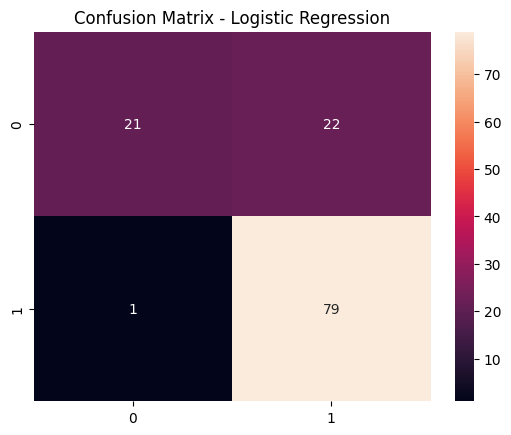

In [20]:
confusion = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(confusion, annot=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [21]:
# Store accuracies
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn)
    ]
}

results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Accuracy
0,Logistic Regression,0.813008
1,K-Nearest Neighbors,0.764228
2,Decision Tree,0.739837


/tmp/ipython-input-22-3537947336.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


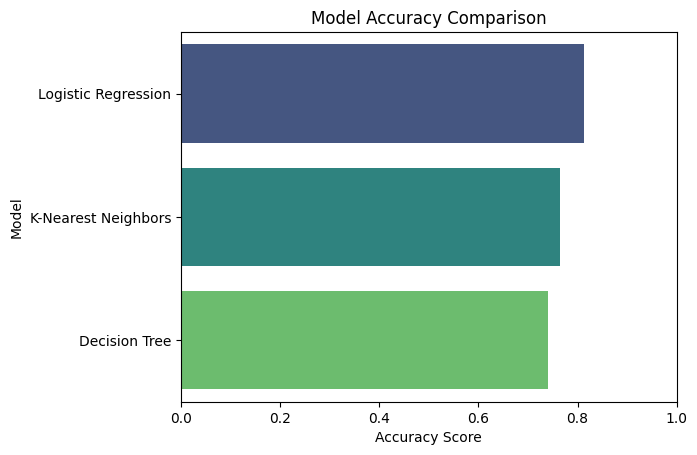

In [22]:
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()


In [23]:
import joblib

# Save the trained model
joblib.dump(lr, 'loan_model.pkl')

# Save the scaler too (important!)
joblib.dump(scaler, 'scaler.pkl')

# Save the LabelEncoders if needed
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [24]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [28]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('loan_model.pkl')
scaler = joblib.load('scaler.pkl')
le = joblib.load('label_encoder.pkl')

st.title("🏦 Loan Approval Prediction App")
st.markdown("Enter details to check if the loan will be approved")

Gender = st.selectbox("Gender", ['Male', 'Female'])
Married = st.selectbox("Married", ['Yes', 'No'])
Dependents = st.selectbox("Dependents", ['0', '1', '2', '3+'])
Education = st.selectbox("Education", ['Graduate', 'Not Graduate'])
Self_Employed = st.selectbox("Self Employed", ['Yes', 'No'])
ApplicantIncome = st.number_input("Applicant Income", value=5000)
CoapplicantIncome = st.number_input("Coapplicant Income", value=0)
LoanAmount = st.number_input("Loan Amount (in thousands)", value=150)
Loan_Amount_Term = st.selectbox("Loan Amount Term", [360.0, 120.0, 240.0, 180.0])
Credit_History = st.selectbox("Credit History", [1.0, 0.0])
Property_Area = st.selectbox("Property Area", ['Urban', 'Rural', 'Semiurban'])

if st.button("Predict Loan Status"):
    input_data = np.array([
        le.transform([Gender])[0],
        le.transform([Married])[0],
        le.transform([Dependents])[0],
        le.transform([Education])[0],
        le.transform([Self_Employed])[0],
        ApplicantIncome,
        CoapplicantIncome,
        LoanAmount,
        Loan_Amount_Term,
        Credit_History,
        le.transform([Property_Area])[0]
    ]).reshape(1, -1)

    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)

    if prediction[0] == 1:
        st.success("✅ Loan Approved!")
    else:
        st.error("❌ Loan Rejected.")


Overwriting app.py


In [30]:
!streamlit app.py

Usage: streamlit [OPTIONS] COMMAND [ARGS]...
Try 'streamlit --help' for help.

Error: No such command 'app.py'.
